In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
air_quality = pd.read_csv('air_quality_long.csv')
air_quality.head(2)

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³


# Reshape The Layout of Tables

In [4]:
#Sort Table rows, according to the age of the passenger
titanic.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [7]:
#Sort the titanic data according to cabin class and age in descending order
#With DataFrame.sort_values(), the rows in the table are sorted according to the defined columns. The index will follow the row order
titanic.sort_values(by=['Pclass','Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


# Long to Wide Table Format

In [9]:
#Filter for NO2 data only
no2 = air_quality[air_quality['parameter']=='no2']
no2


,city,country,date.utc,location,parameter,value,unit
1825,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1826,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
1827,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
1828,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
1829,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
5267,London,GB,2019-04-09 06:00:00+00:00,London Westminster,no2,41.0,µg/m³
5268,London,GB,2019-04-09 05:00:00+00:00,London Westminster,no2,41.0,µg/m³
5269,London,GB,2019-04-09 04:00:00+00:00,London Westminster,no2,41.0,µg/m³
5270,London,GB,2019-04-09 03:00:00+00:00,London Westminster,no2,67.0,µg/m³


In [ ]:
#Use 3 measurements(head) for each location (groupby)
no2_subset = no2.sort_index().groupby(['location']).head(3)
no2_subset

NameError: name 'no3' is not defined

# Values for the three stations as separate columns next to each other
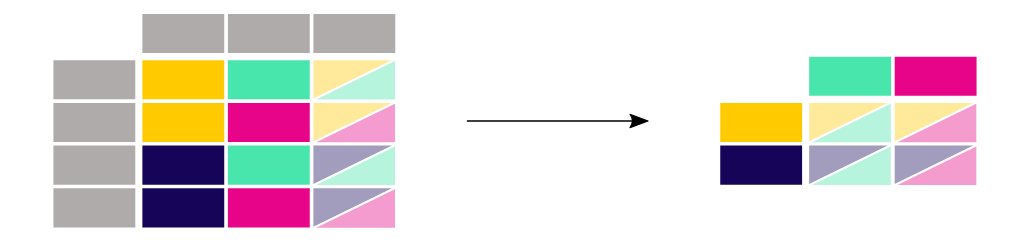

In [13]:
#The pivot() function is purely reshaping of the data: A single value for each index/column combination is required
no2_subset.pivot(columns='location',values='value')

location,BETR801,FR04014,London Westminster
1825,NaN,20.0,NaN
1826,NaN,21.8,NaN
1827,NaN,26.5,NaN
3501,41.0,NaN,NaN
3502,45.0,NaN,NaN
3503,43.5,NaN,NaN
3664,NaN,NaN,11.0
3665,NaN,NaN,11.0
3666,NaN,NaN,11.0


<Axes: >

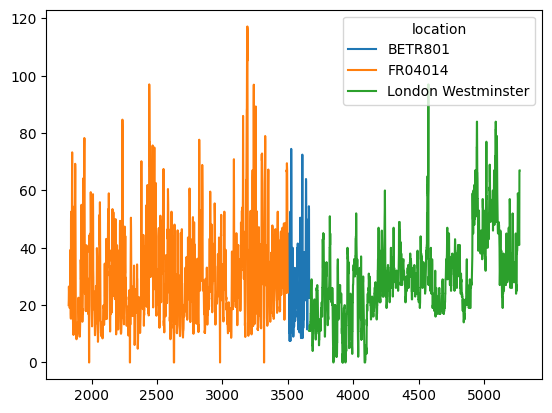

In [14]:
no2.pivot(columns='location', values='value').plot()

# Pivot Table
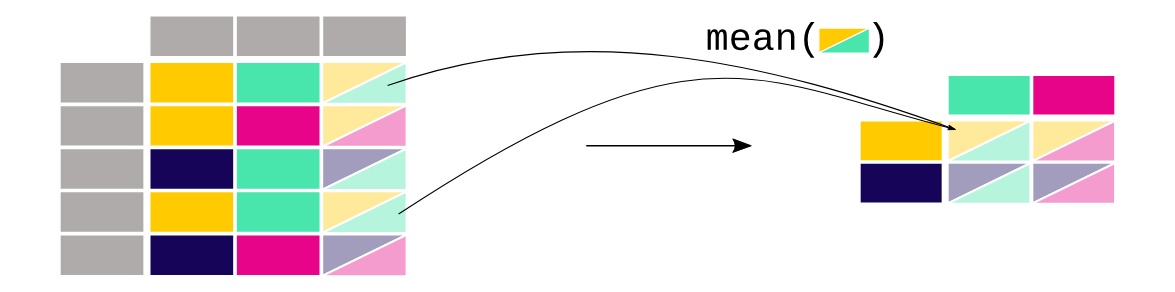

Get the mean concentrations for NO2 and PM2.5 in each of the stations in table form

In [16]:
air_quality.pivot_table(
    values='value',index='location',columns='parameter',aggfunc='mean'
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of pivot(), the data is only rearranged.
When multiple values needs to be aggregated, pivot_table() can be used, providing an aggregation function(mean) on how to combine these values

In [19]:
#When interested in the row/column margin (sub-totals) for each variable, set the margins parameter to True
air_quality.pivot_table(
    values='value',
    index='location',
    columns='parameter',
    aggfunc='mean',
    margins='True'
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [20]:
#pivot_table() is directly linked to groupby(). The same result can be derived by grouping on both parameter and location
air_quality.groupby(['parameter','location'])[['value']].mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

# Wide to Long Format
We can add a new index to the DataFrame with reset_index()

In [21]:
no2_pivoted = no2.pivot(columns='location',values='value').reset_index()
no2_pivoted.head()

location,index,BETR801,FR04014,London Westminster
0,1825,NaN,20.0,NaN
1,1826,NaN,21.8,NaN
2,1827,NaN,26.5,NaN
3,1828,NaN,24.9,NaN
4,1829,NaN,21.4,NaN


I want to collect all air quality NO2 measurements in a single column (long format)